### README
Author: John Wang

This is a simple demostration on applying some image processing technies as listed below:
* Converting images to grayscale
* Computing Images gradients
* Smooth the images using Gaussian smoothing with custom Gaussian kernal
* Compute the edge magnitude and orientation of images

### Dev Env (Python 3.10.5)

numpy==1.26.1

opencv-python==4.9.0.80

matplotlib==3.8.2

### Imports & Setup
Image directory and image file name can be setup here

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as matimg
import cv2

%matplotlib inline

# Relative dir or absolute dir
LOCAL_DIR = "Images/"
IMG1_NAME = "Shuttle1.jpg"
IMG2_NAME = "Shuttle2.jpg"


### Image Acquisition


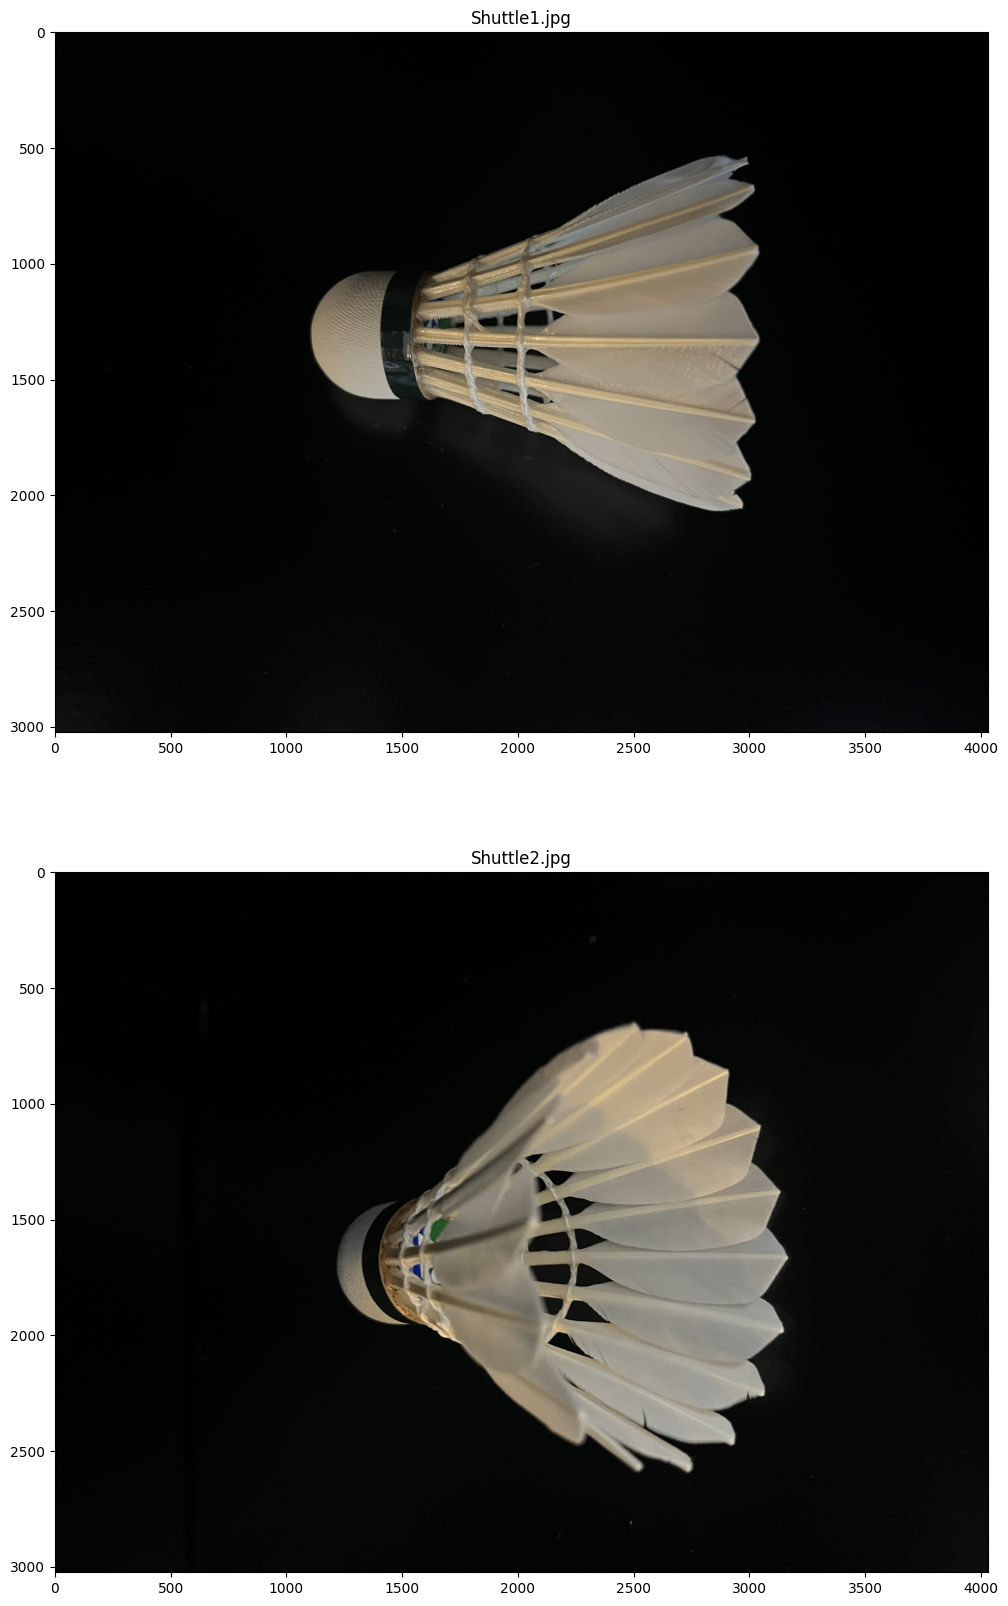

In [121]:
def show_images(*args, cmap=None):
    """
    Display multiple imgs with their descriptions.
    Arguments should be in the form: img1, description1, img2, description2, ...
    """
    n = len(args)
    n_images = n // 2

    # Create a subplot with n_images rows
    fig, axes = plt.subplots(n_images, 1, figsize=(20, 10*n_images))

    # In case of only one image, axes is not a list, so we make it a list
    if n_images == 1:
        axes = [axes]

    # Loop arg pairs
    for i in range(0, n, 2):
        img = args[i]
        description = args[i + 1]
        ax = axes[i // 2]

        # Show image with optional cmap val
        if cmap:
            ax.imshow(img, cmap=cmap)
        else:
            ax.imshow(img)
        ax.set_title(description)

    plt.show()

# Load the two source images
image1 = matimg.imread(f"{LOCAL_DIR}{IMG1_NAME}")
image2 = matimg.imread(f"{LOCAL_DIR}{IMG2_NAME}")

show_images(image1, IMG1_NAME, image2, IMG2_NAME)

### Convert to Grayscale

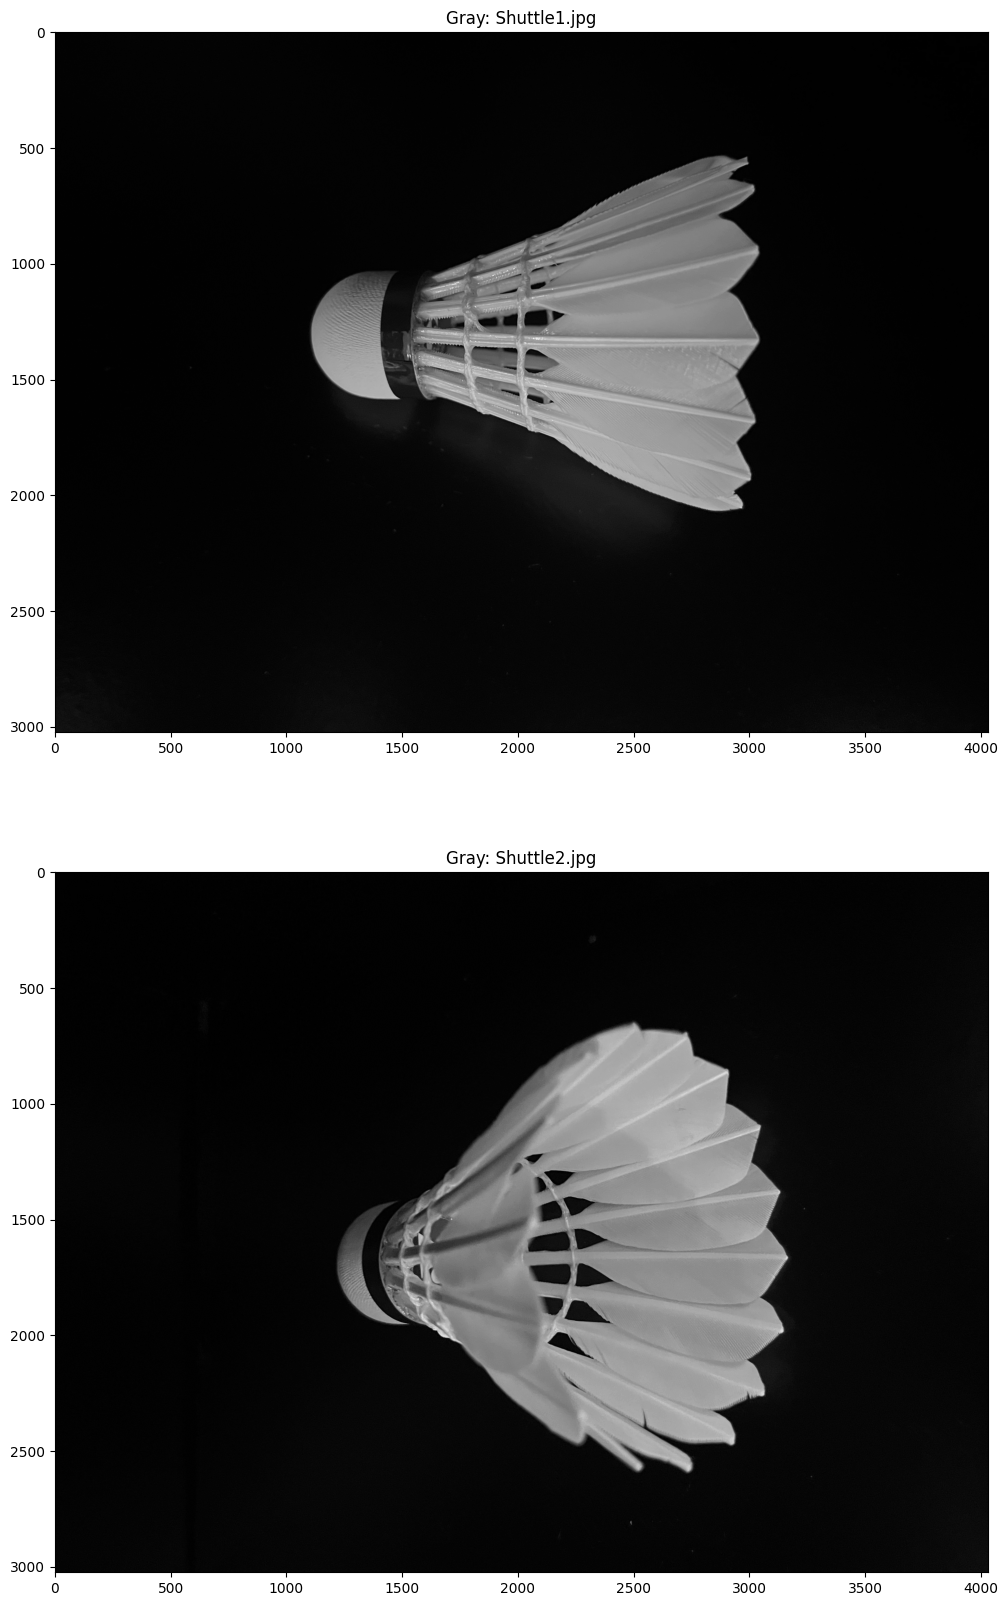

In [122]:
# Convert the two images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

show_images(gray1, f"Gray: {IMG1_NAME}", gray2, f"Gray: {IMG2_NAME}", cmap="gray")

### Smooth the images using Gaussian smoothing
Note for image hign in resolution, szie of 11 may not bring significant difference compared to 5.

Try push it to 30 or higher to see more a significant effect.

DEBUG: Sigma selected for size 5 is 1
DEBUG: -----gauss_kernal_size_5-----
[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]
DEBUG: Sigma selected for size 11 is 2
DEBUG: -----gauss_kernal_size_11-----
[[7.68103295e-05 2.36592471e-04 5.67555834e-04 1.06033389e-03
  1.54277671e-03 1.74819504e-03 1.54277671e-03 1.06033389e-03
  5.67555834e-04 2.36592471e-04 7.68103295e-05]
 [2.36592471e-04 7.28756116e-04 1.74819504e-03 3.26605832e-03
  4.75208682e-03 5.38481983e-03 4.75208682e-03 3.26605832e-03
  1.74819504e-03 7.28756116e-04 2.36592471e-04]
 [5.67555834e-04 1.74819504e-03 4.19370190e-03 7.83486662e-03
  1.13996637e-02 1.29175112e-02 1.13996637e-02 7.83486662e-03
  4.19370190e-03 1.74819504e-03 5.67555834e-04]
 [1.06033389e-03 3.26605832e-03 7.8348666

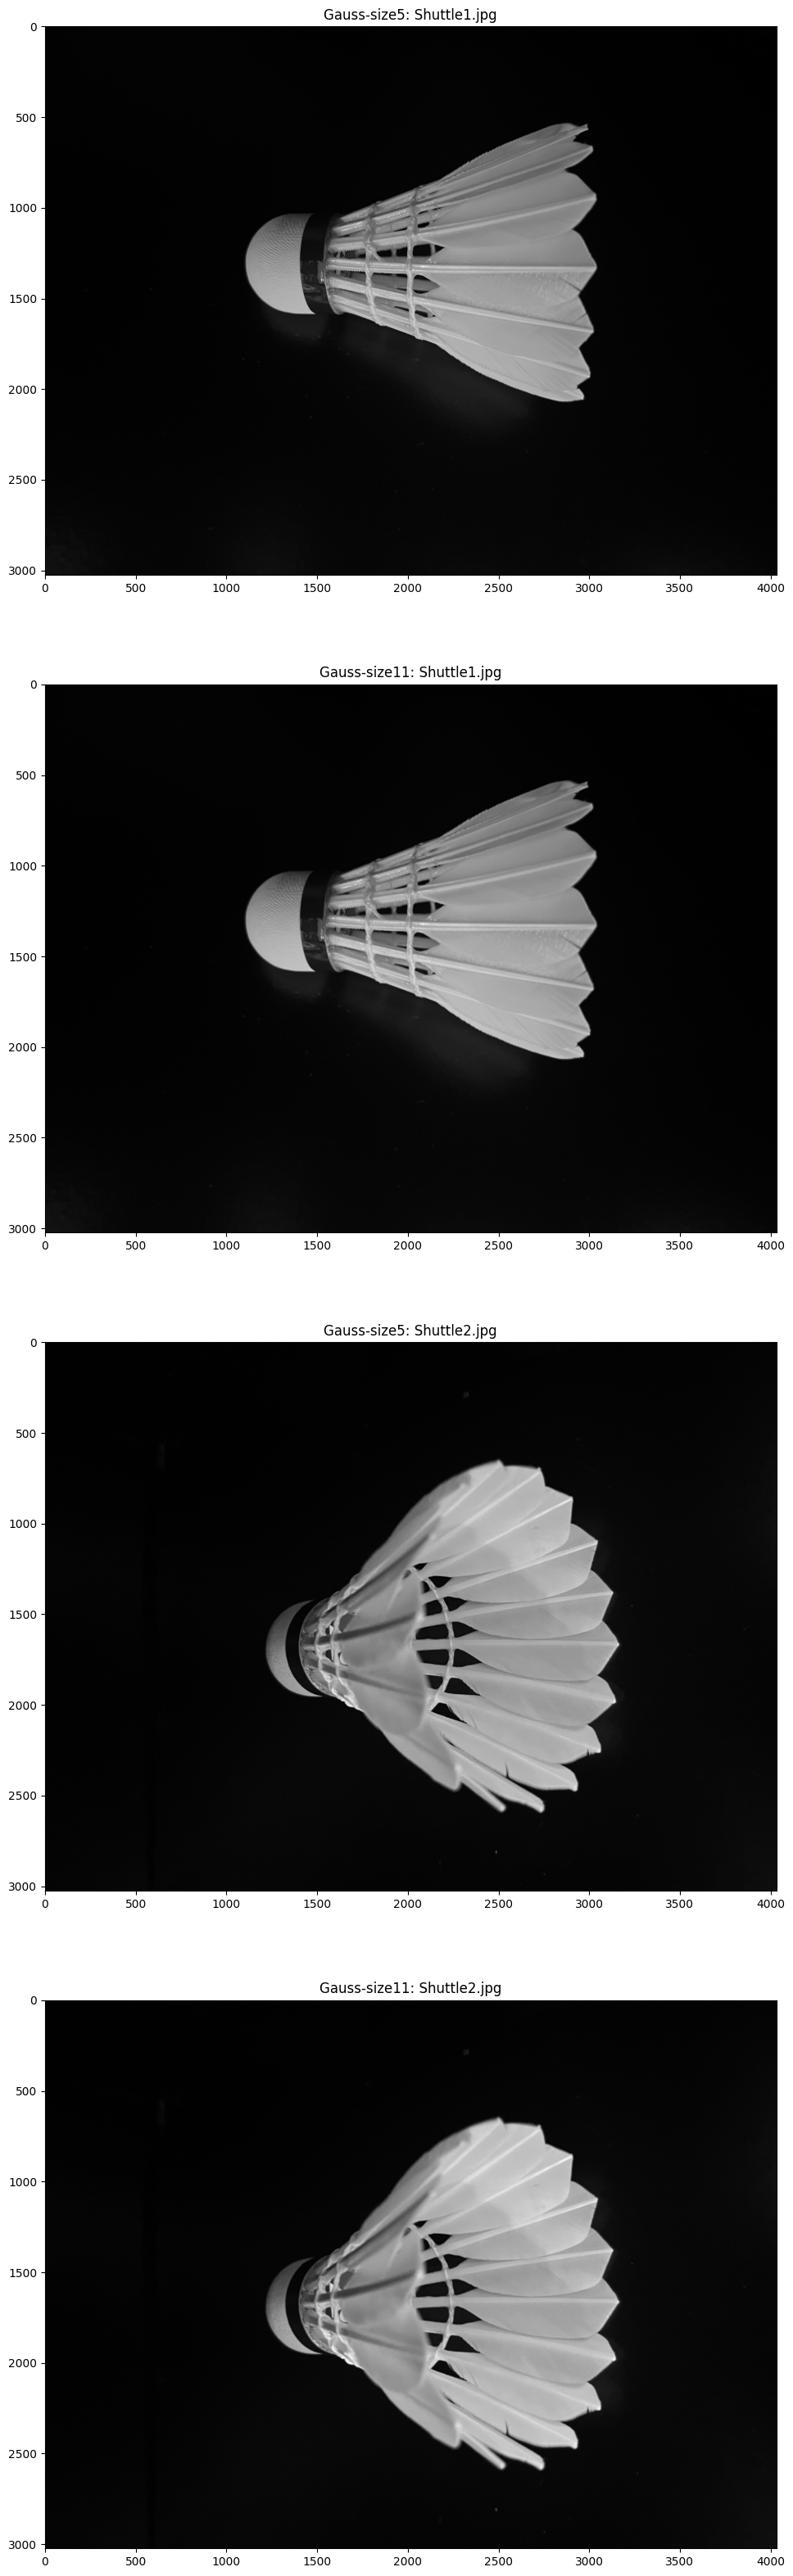

In [125]:
def get_gaussian_kernal(size, sigma=1, auto_set_sigma=False):
    half_size = int(size) // 2
    
    # Feature to auto set sigma.
    # For the rule of Thumb as discussed in class: 3*sigma = half_size
    if auto_set_sigma:
        sigma = round(half_size/3)
        sigma = max(sigma, 1)
    print(f"DEBUG: Sigma selected for size {size} is {sigma}")
    
    x, y = np.mgrid[-half_size:half_size+1, -half_size:half_size+1]
    # This computs the 1/(2pi*sigma^2) nomalization terms
    normalization_term = 1 / (2.0 * np.pi * sigma**2)
    # This computs the e^-(x^2+y^2)/(2*sigma^2) term for each grid values
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2)))
    # Normalize g
    g_normalized = g*normalization_term
    return g_normalized

gauss_kernal_size_5 = get_gaussian_kernal(5,auto_set_sigma=True)
print("DEBUG: -----gauss_kernal_size_5-----")
print(gauss_kernal_size_5)

# Note fpr image hign in resolution, szie of 11 may not bring significant difference compared to 5
# Try push it to 30 or higher to see more a significant effect
gauss_kernal_size_11 = get_gaussian_kernal(11,auto_set_sigma=True)
print("DEBUG: -----gauss_kernal_size_11-----")
print(gauss_kernal_size_11)

# Apply the Gauss filters
gauss_img1_size5 = cv2.filter2D(gray1, cv2.CV_64F, gauss_kernal_size_5)
gauss_img1_size11 = cv2.filter2D(gray1, cv2.CV_64F, gauss_kernal_size_11)
gauss_img2_size5 = cv2.filter2D(gray2, cv2.CV_64F, gauss_kernal_size_5)
gauss_img2_size11 = cv2.filter2D(gray2, cv2.CV_64F, gauss_kernal_size_11)

show_images(gauss_img1_size5, f"Gauss-size5: {IMG1_NAME}",
            gauss_img1_size11, f"Gauss-size11: {IMG1_NAME}",
            gauss_img2_size5, f"Gauss-size5: {IMG2_NAME}",
            gauss_img2_size11, f"Gauss-size11: {IMG2_NAME}",
            cmap='gray')

    

### Compute Image Gradients

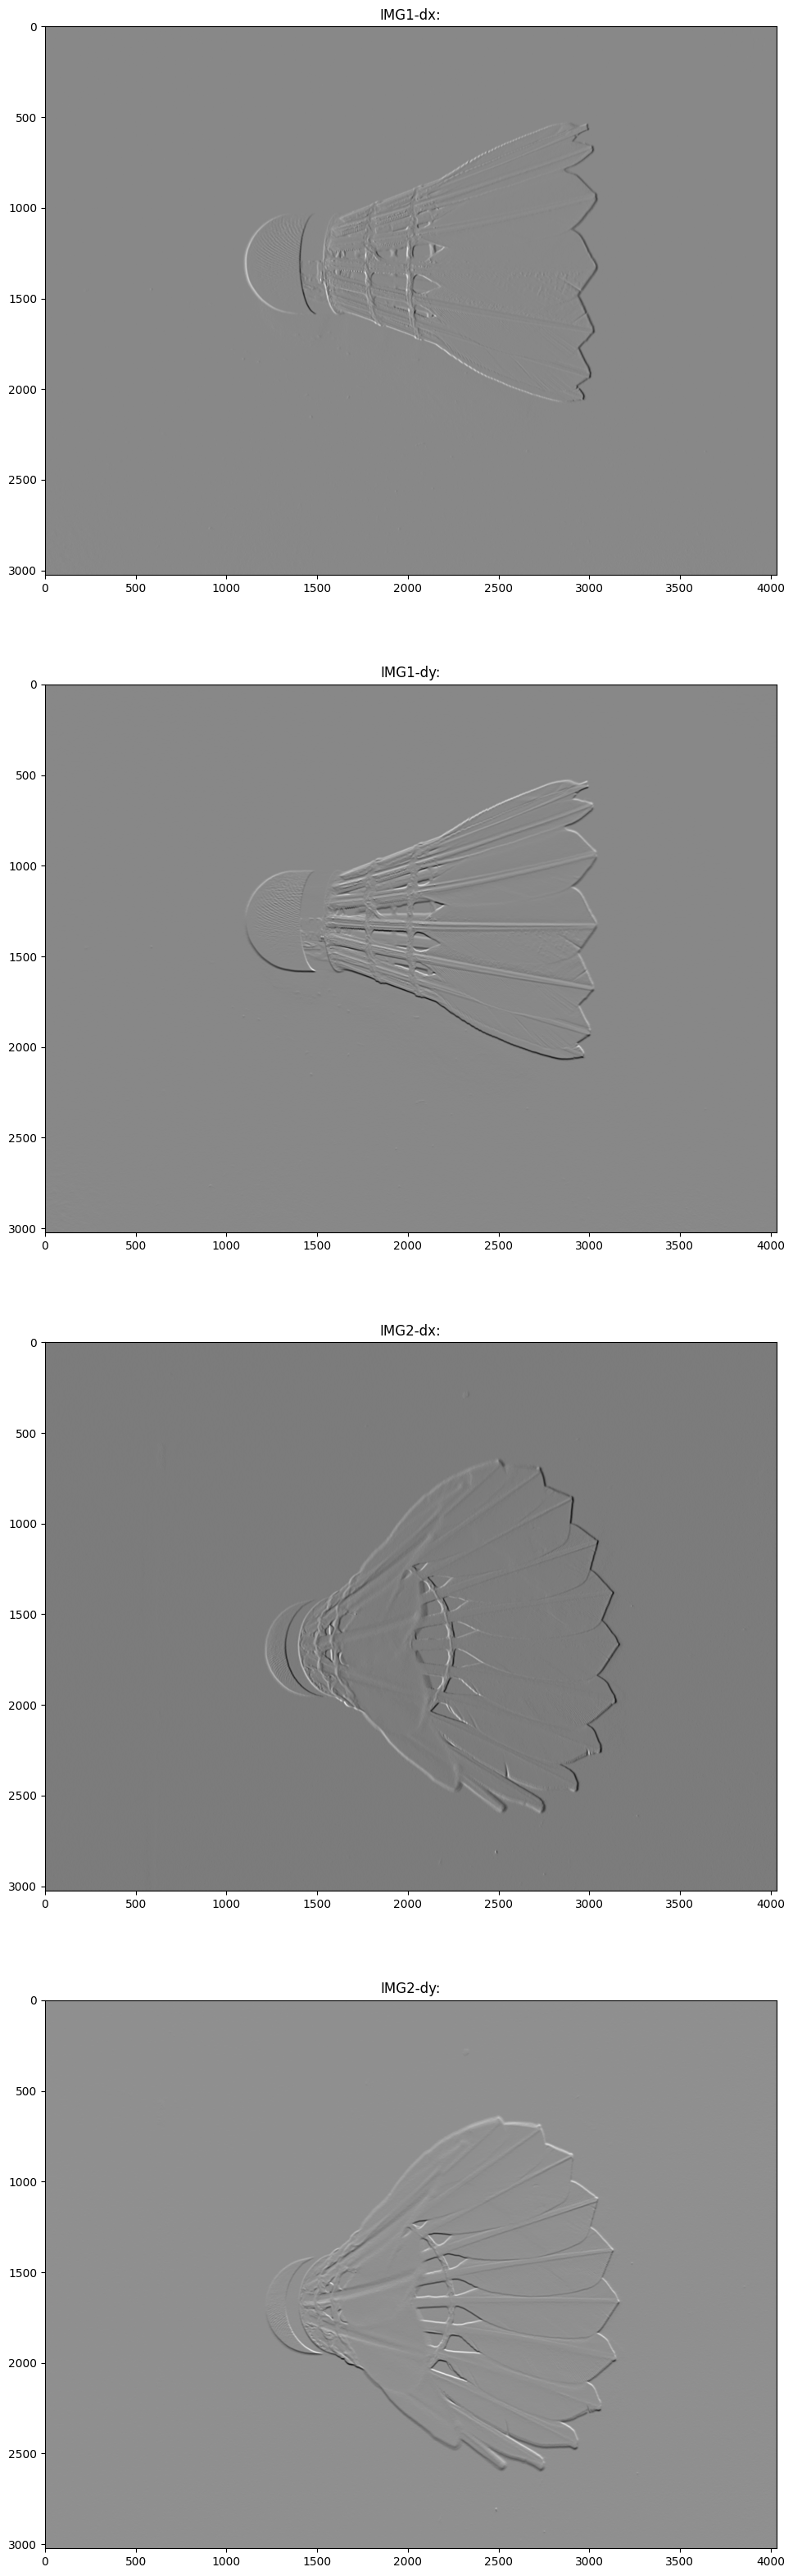

In [126]:
# Source imgs can be modified to size of 5 here.
smooth_img1 = gauss_img1_size11
smooth_img2 = gauss_img2_size11

ksize = 15

# x derivative for img1
img1_sobel_dx = cv2.Sobel(smooth_img1, cv2.CV_64F, 1, 0, ksize=ksize)
# y derivative for img1
img1_sobel_dy = cv2.Sobel(smooth_img1, cv2.CV_64F, 0, 1, ksize=ksize)
# x derivative for img2
img2_sobel_dx = cv2.Sobel(smooth_img2, cv2.CV_64F, 1, 0, ksize=ksize)
# y derivative for img2
img2_sobel_dy = cv2.Sobel(smooth_img2, cv2.CV_64F, 0, 1, ksize=ksize)

show_images(img1_sobel_dx, "IMG1-dx:",
            img1_sobel_dy, "IMG1-dy:",
            img2_sobel_dx, "IMG2-dx:",
            img2_sobel_dy, "IMG2-dy:",
            cmap="gray")


### Compute the Edge Magnitude and Orientation

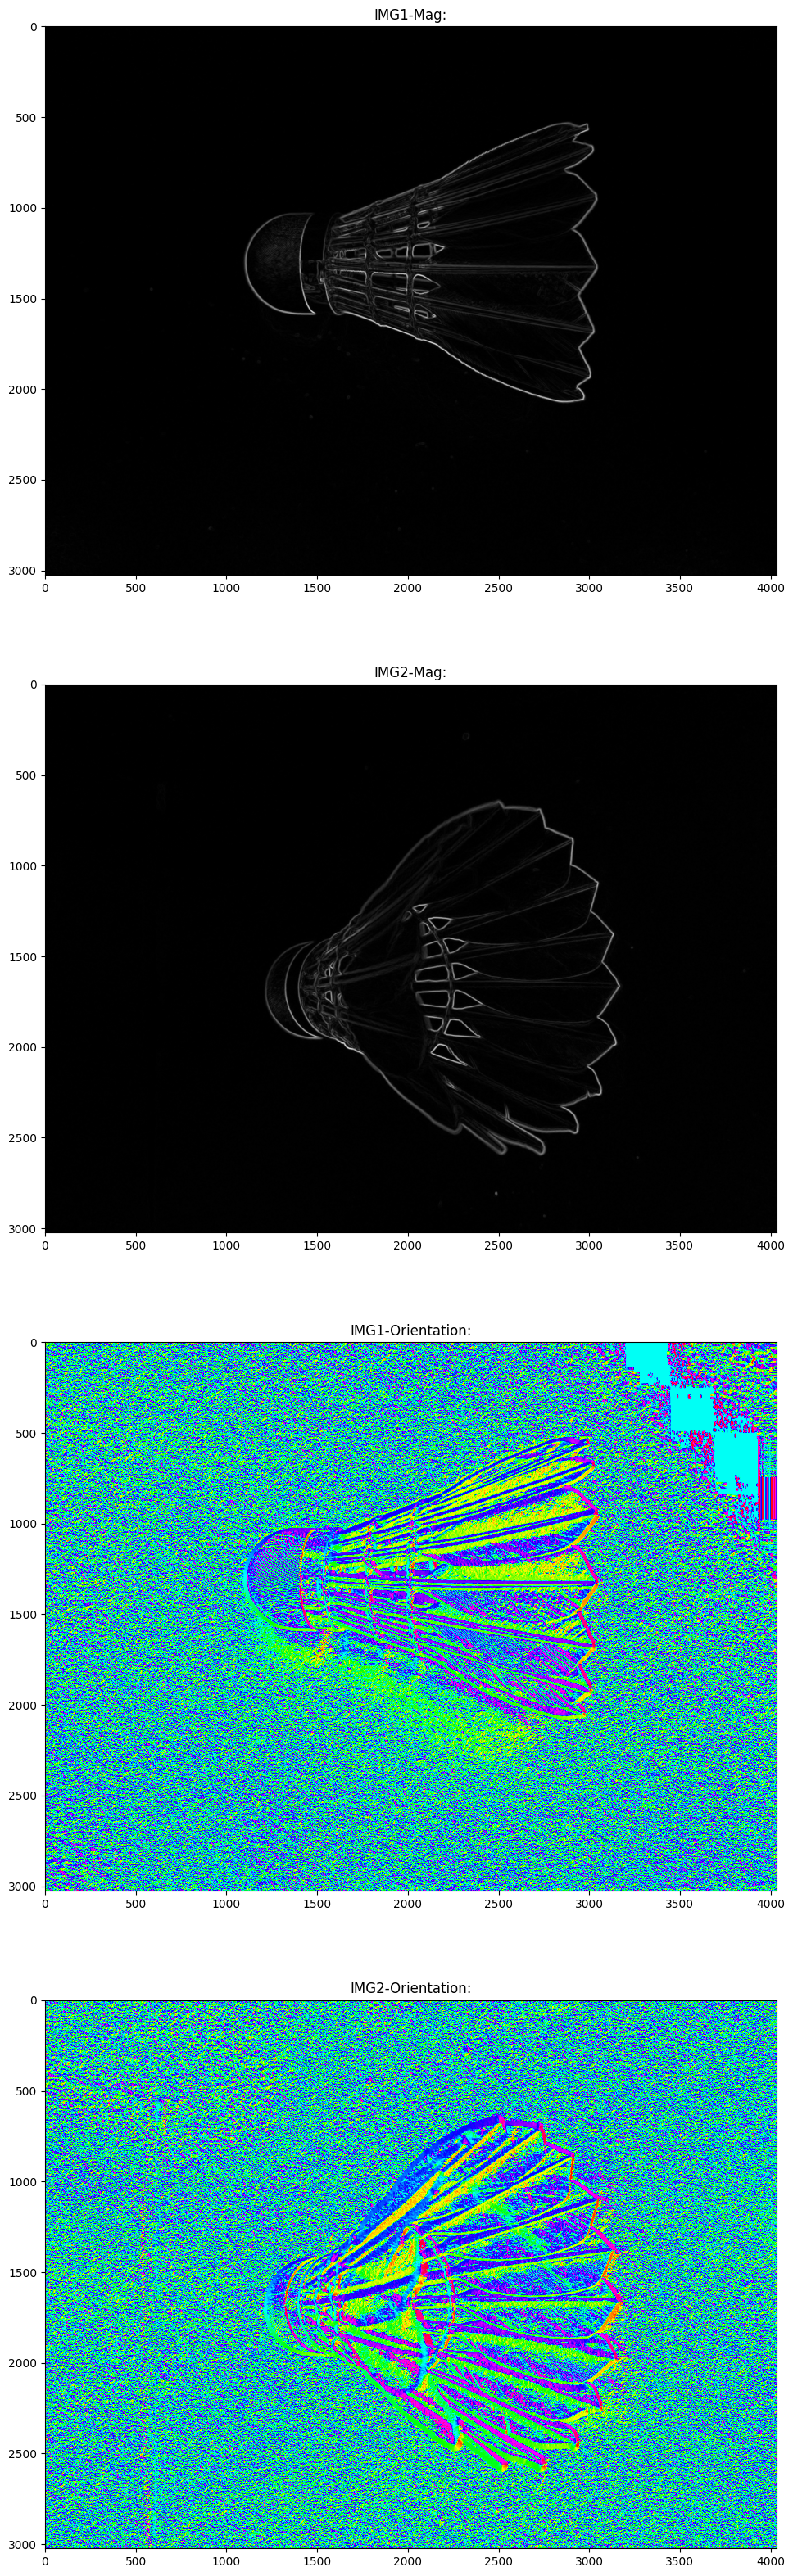

In [127]:
# Configurable cmap_mode for orientation
orientation_cmap_mode = "hsv"

# Computer the magnitude as the sqrt of squred values of the two diffrential (dx and dy)
magnitude_img1 = np.sqrt((img1_sobel_dx * img1_sobel_dx) +
                              (img1_sobel_dy * img1_sobel_dy))

magnitude_img2 = np.sqrt((img2_sobel_dx * img2_sobel_dx) +
                              (img2_sobel_dy * img2_sobel_dy))

# orientation can be computed by arctan2
orientation_img1 = np.arctan2(img1_sobel_dy, img1_sobel_dx) * (180/np.pi)
orientation_img2 = np.arctan2(img2_sobel_dy, img2_sobel_dx) * (180/np.pi)
orientation_img1 = (orientation_img1 + 180)/360

# Create a subplot that shows 4 images in one column
fig, axes = plt.subplots(4, 1, figsize=(20, 40))

axes[0].imshow(magnitude_img1, cmap="gray")
axes[0].set_title("IMG1-Mag:")

axes[1].imshow(magnitude_img2, cmap="gray")
axes[1].set_title("IMG2-Mag:")

axes[2].imshow(orientation_img1, cmap=orientation_cmap_mode)
axes[2].set_title("IMG1-Orientation:")

axes[3].imshow(orientation_img2, cmap=orientation_cmap_mode)
axes[3].set_title("IMG2-Orientation:")

# Show the plot
plt.show()



### Canny Edge Detection with opencv

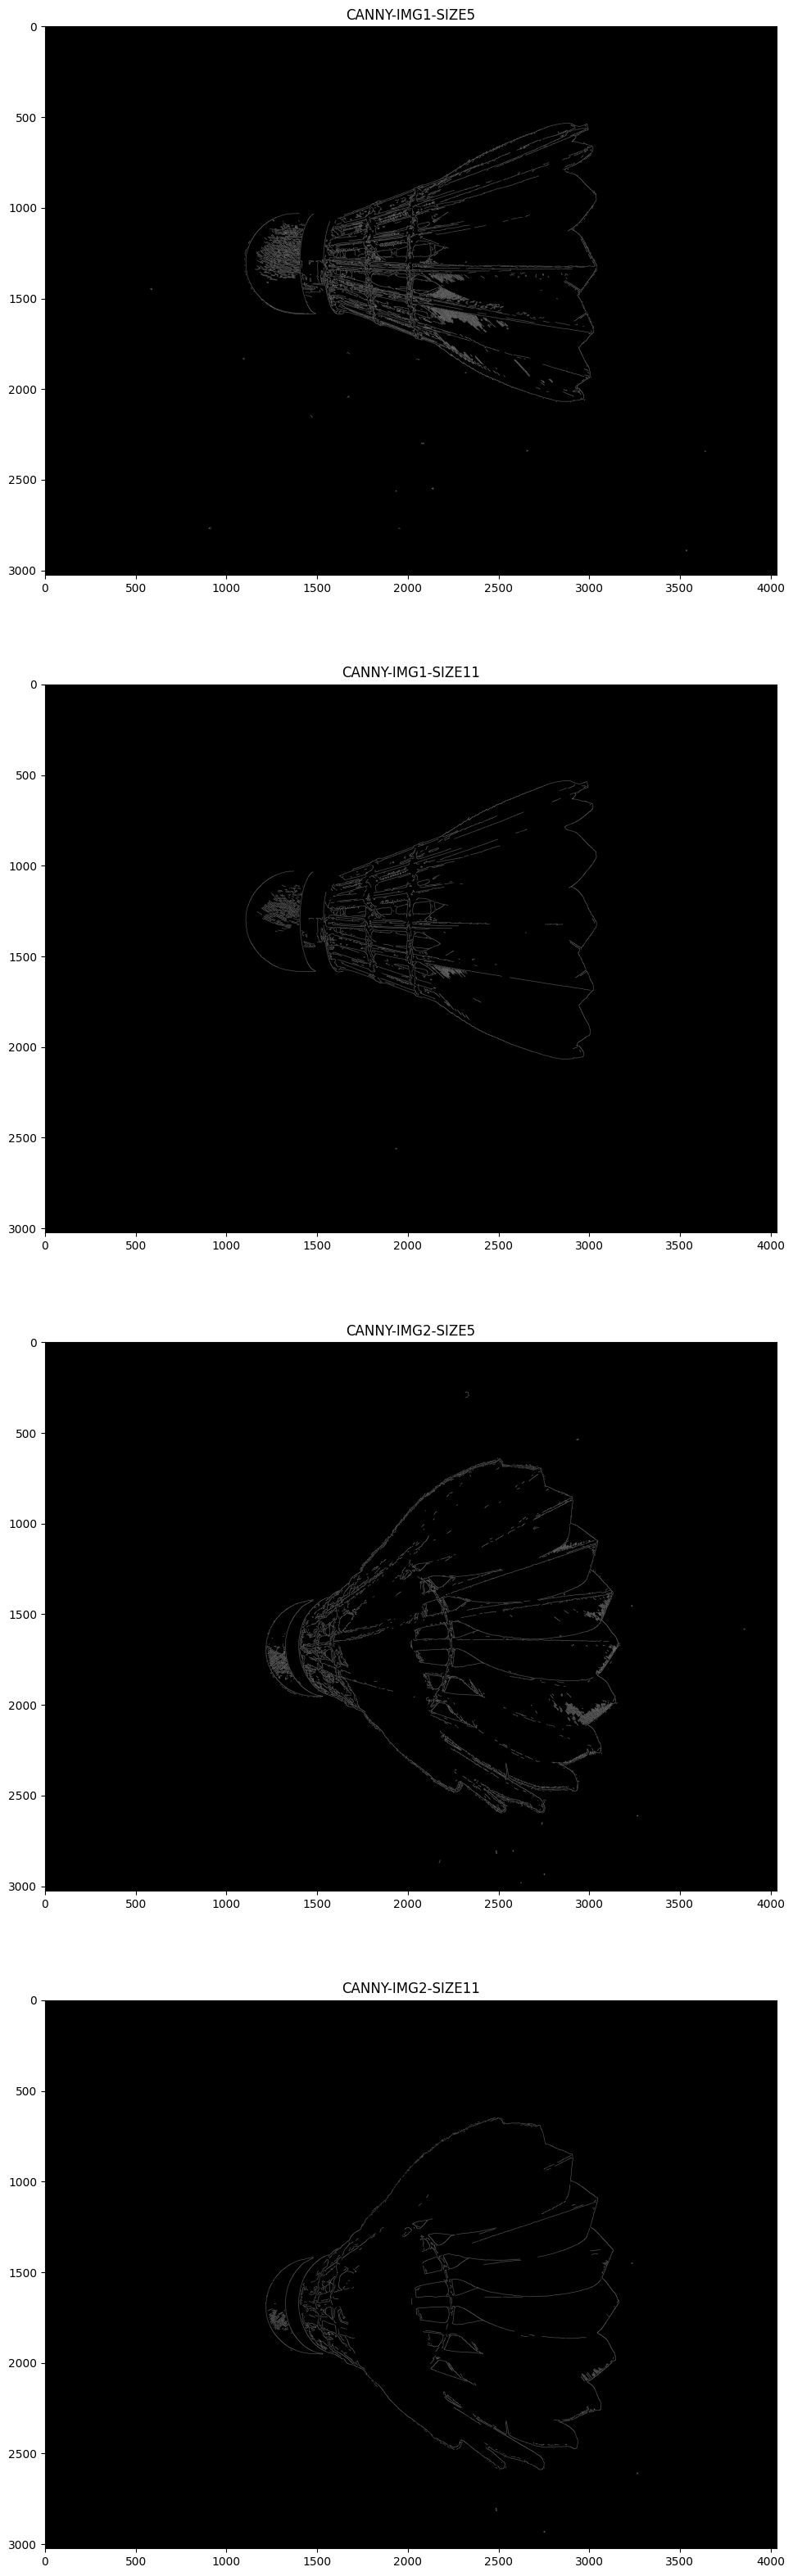

In [128]:
# Adjustable thresholds for Canny() based on characteristic of the image.
thresh1 = 30
thresh2 = 50

# As per offical Canny() doc, source img should be 8-bit
# https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de
# convert smoothed images to 8 bit first
uint8_img1_size5 = np.uint8(gauss_img1_size5)
uint8_img1_size11 = np.uint8(gauss_img1_size11)
uint8_img2_size5 = np.uint8(gauss_img2_size5)
uint8_img2_size11 = np.uint8(gauss_img2_size11)

# Now for the edge detection with Canny()
canny_edge_img1_size5 = cv2.Canny(uint8_img1_size5, thresh1, thresh2)
canny_edge_img1_size11 = cv2.Canny(uint8_img1_size11, thresh1, thresh2)
canny_edge_img2_size5 = cv2.Canny(uint8_img2_size5, thresh1, thresh2)
canny_edge_img2_size11 = cv2.Canny(uint8_img2_size11, thresh1, thresh2)

show_images(canny_edge_img1_size5, "CANNY-IMG1-SIZE5",
            canny_edge_img1_size11, "CANNY-IMG1-SIZE11",
            canny_edge_img2_size5, "CANNY-IMG2-SIZE5",
            canny_edge_img2_size11, "CANNY-IMG2-SIZE11",
            cmap='gray')
